In [1]:
# tools from quantum awesomeness directory
from devices import supportedDevices, getLayout# info on supported devices
from QuantumAwesomeness import *
import mwmatching as mw # perfect matching

# other tools
import random, numpy, math, time, copy, os, subprocess
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product
import warnings
warnings.filterwarnings('ignore')

## Set up instance
Specify the device you want to use (*device*), whether you want to generate new data or analyse existing data (*dataNeeded*), and whether you want data for a simulation, the real device, or both (*sims_to_use*).

In [2]:
device = 'ibmqx5'
dataNeeded = False
sims_to_use = [True,False]

## Execute Instance

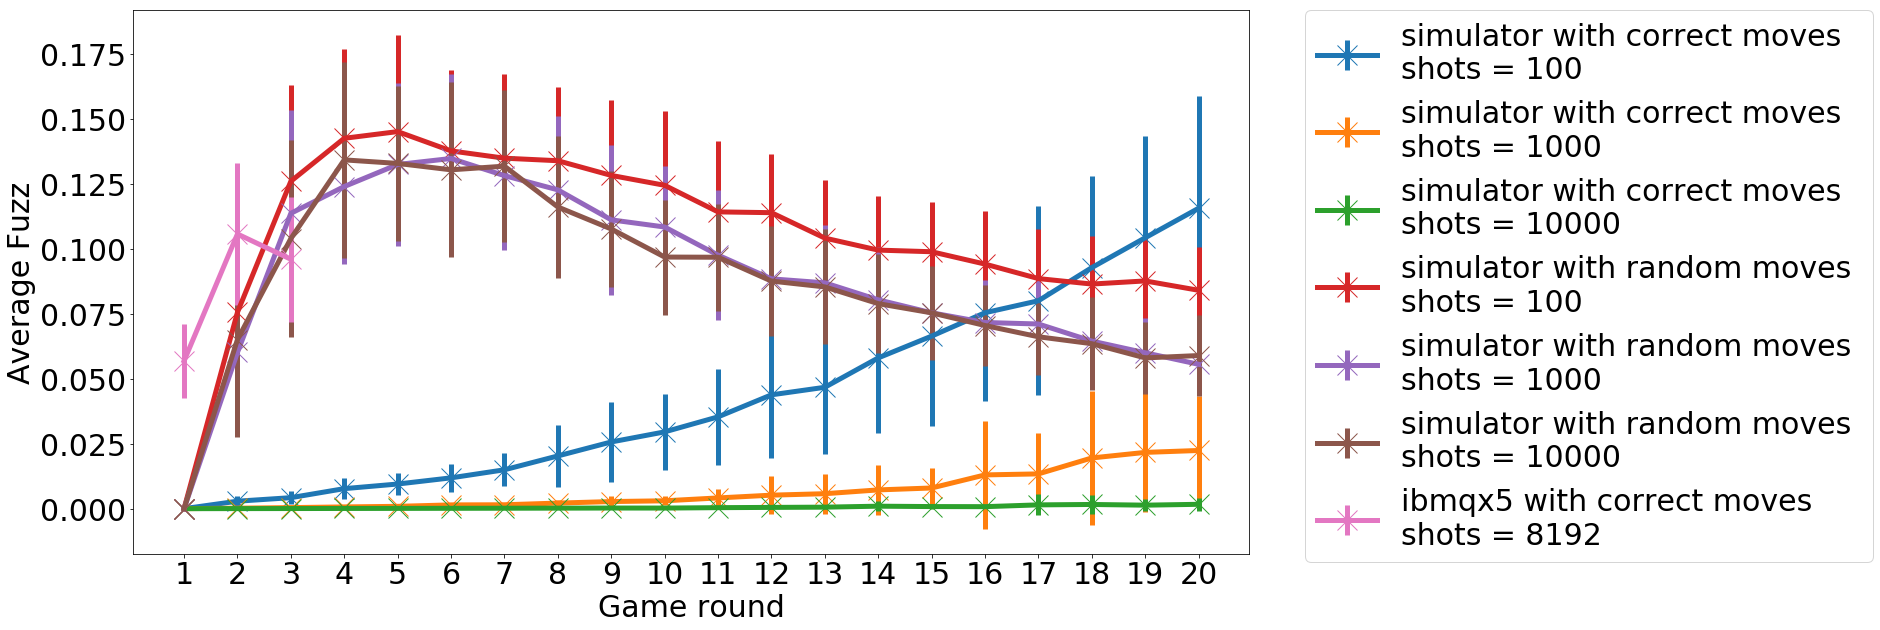

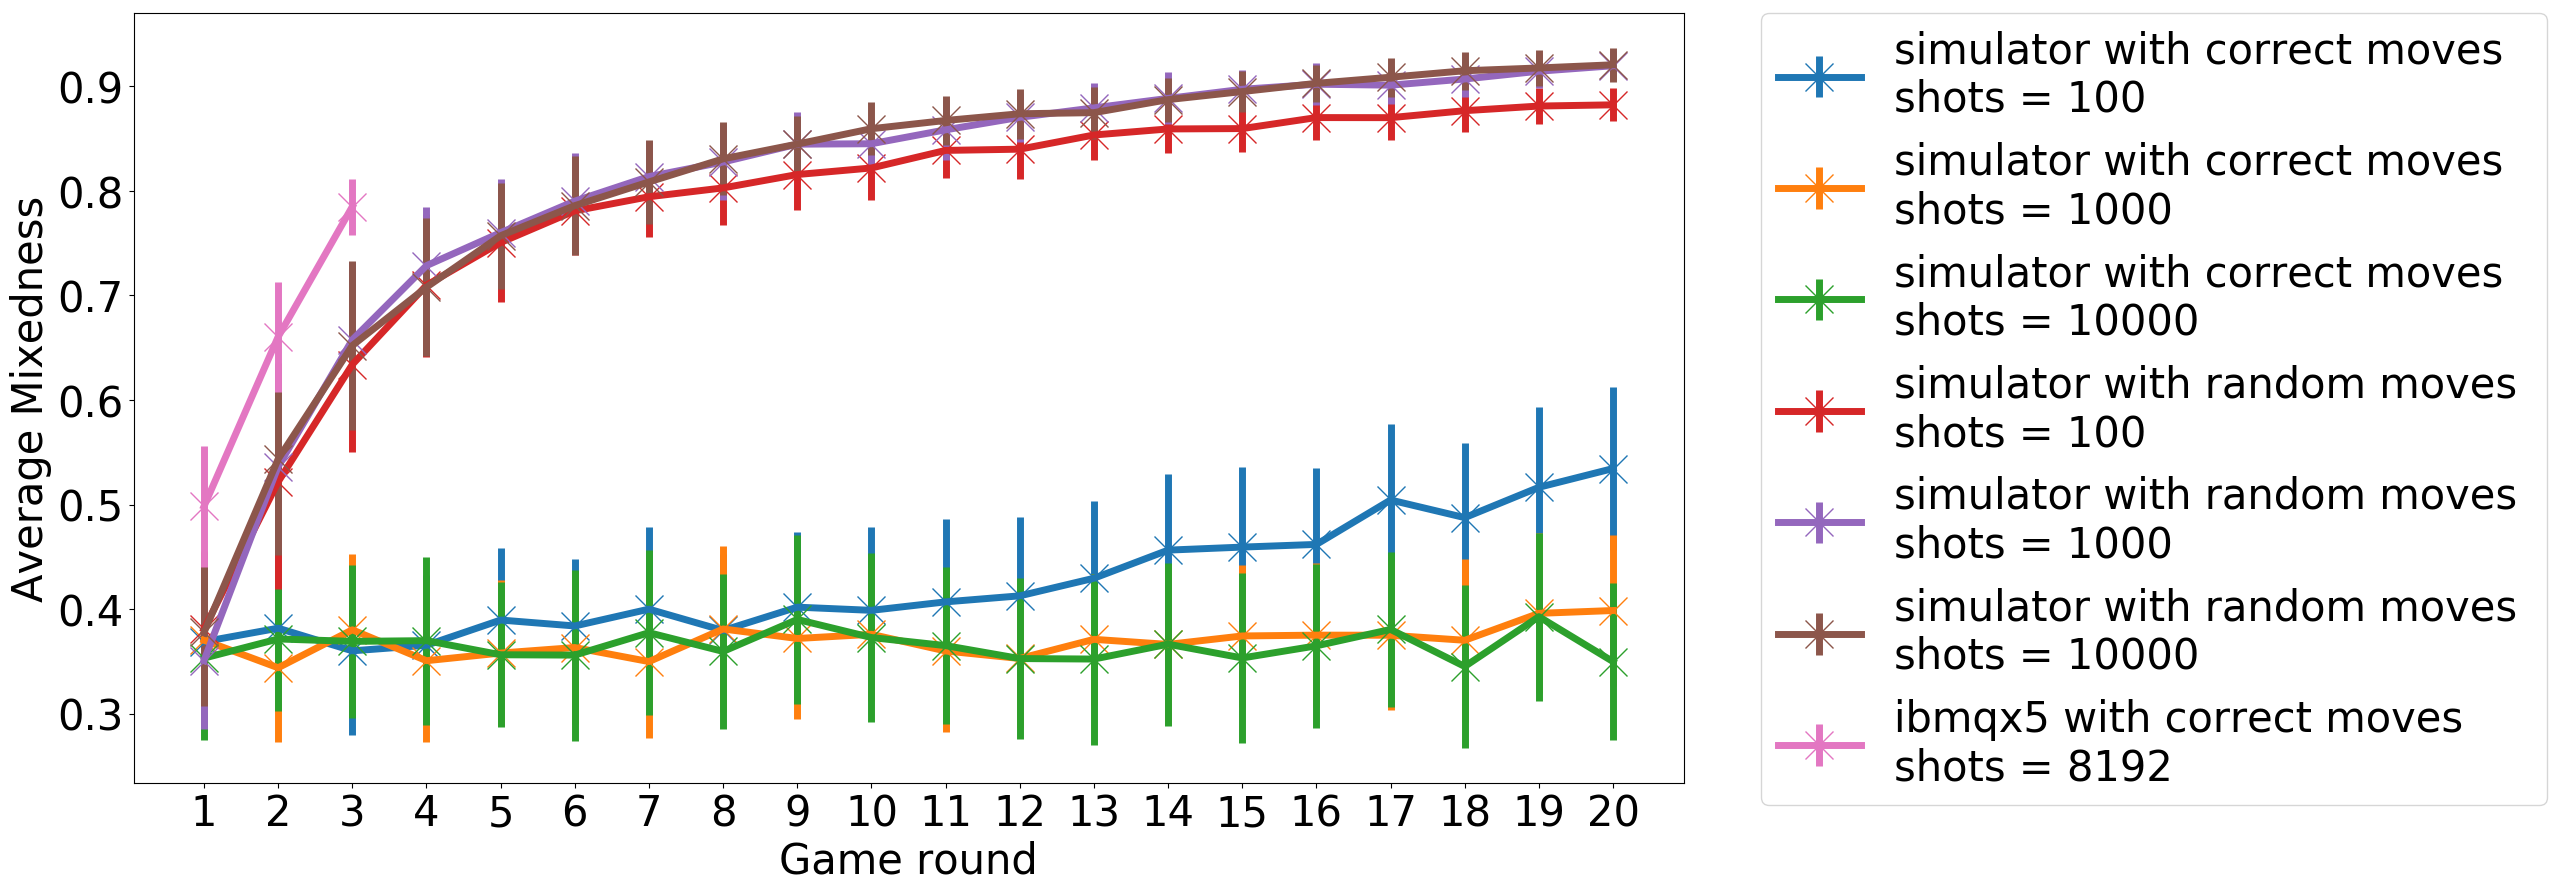

In [3]:
num, area, entangleType, pairs, pos, example, sdk, runs = getLayout(device)

if dataNeeded==False:
    maxMaxScore = 0
    for sim in sims_to_use:
        maxMaxScore = max( maxMaxScore, runs[sim]['maxScore'] )

    X = range(1,maxMaxScore+1)
    Yf = []
    yf = []
    Yo = []
    yo = []
    labels = []

for sim in sims_to_use:
    for move in runs[sim]['move']:
        for shots in runs[sim]['shots']:
            if dataNeeded:
                GetData( device, move, shots, sim, runs[sim]['samples'], runs[sim]['maxScore'] )
            else:
                fuzzAv, entangleAv = ProcessData( device, move, shots, sim )
                Yf.append( fuzzAv[0] + [math.nan]*(maxMaxScore-len(fuzzAv[0])) )
                yf.append( fuzzAv[1] + [math.nan]*(maxMaxScore-len(fuzzAv[1])) )
                Yo.append( entangleAv[0] + [math.nan]*(maxMaxScore-len(entangleAv[0])) )
                yo.append( entangleAv[1] + [math.nan]*(maxMaxScore-len(entangleAv[1])) )
                labels.append( device*(sim==False) + 'simulator'*sim + ' with ' + 'correct'*(move=='C') + 'random'*(move=='R') + ' moves \nshots = ' + str(shots)  )

if dataNeeded==False:
    MakeGraph(X,Yf,yf,["Game round","Average Fuzz"],labels=labels)
    MakeGraph(X,Yo,yo,["Game round","Average Mixedness"],labels=labels)